In [19]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from src.config.settings import RESULTS_PATH, DATA_PATH
import json

select models to analyze

In [20]:
ENGLISH_MODEL = 'ENGLISH_W2V_4'
JAPANESE_MODEL = 'JAPANESE_W2V_14'

visualization functins

In [21]:
def loss_curves(df):
    plt.plot(df[['loss', 'val_loss']], label=['training loss', 'validation loss'])
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('cross entropy loss');

def metrics_grid(df, labels):
    fig, axs = plt.subplots(2,2, figsize=(15, 10))
    val_accuracy = [ f'val_accuracies_{i}' for i in labels.keys()]
    axs[0, 0].plot(df[val_accuracy], label=labels.values(), alpha=.15)
    axs[0, 0].plot(df[val_accuracy].T.mean(), color='red', label='unweighted mean')
    axs[0, 0].set_title('accuracy')
    axs[0, 0].set_ylim((-0.01, 1.01))
    #axs[0, 0].legend(bbox_to_anchor=(1, 1))

    val_precision = [ f'val_precisions_{i}' for i in labels.keys()]
    axs[0, 1].plot(df[val_precision], label=labels.values(), alpha=.15)
    axs[0, 1].plot(df[val_precision].T.mean(), color='red', label='unweighted mean')
    axs[0, 1].set_title('precision')
    axs[0, 1].set_ylim((0, 1))
    axs[0, 1].set_ylim((-0.01, 1.01))
    axs[0, 1].legend(bbox_to_anchor=(1, .5), loc='upper left')

    val_f1s = [ f'val_f1s_{i}' for i in labels.keys()]
    axs[1, 0].plot(df[val_f1s], label=labels.values(), alpha=.15)
    axs[1, 0].plot(df[val_f1s].T.mean(), color='red', label='unweighted mean')
    axs[1, 0].set_title('f1 score')
    axs[1, 0].set_ylim((-0.01, 1.01))

    val_recalls = [ f'val_recalls_{i}' for i in labels.keys()]
    axs[1, 1].plot(df[val_recalls], label=labels.values(), alpha=.15)
    axs[1, 1].plot(df[val_recalls].T.mean(), color='red', label='unweighted mean')
    axs[1, 1].set_title('recall')
    axs[1, 1].set_ylim((-0.01, 1.01))

    axs[1, 1].set_xlabel('Epoch')
    axs[1, 0].set_xlabel('Epoch')

labels_japanese = os.path.join(DATA_PATH, 'additional', 'japanese_news_labels.json')
labels_englsih = os.path.join(DATA_PATH, 'additional', 'english_news_labels.json')
with open(labels_englsih, 'r') as file:
    labels_englsih = json.load(file)
with open(labels_japanese, 'r') as file:
    labels_japanese = json.load(file)

vocab_japanese = os.path.join(DATA_PATH, 'processed', 'japanese_capped_vocab_vocab.json')
vocab_englsh = os.path.join(DATA_PATH, 'processed', 'english_capped_vocab_vocab.json')
with open(vocab_englsh, 'r') as file:
    vocab_englsh = json.load(file)
with open(vocab_japanese, 'r') as file:
    vocab_japanese = json.load(file)


targets_japanese = np.load(os.path.join(DATA_PATH, 'processed', 'japanese_capped_vocab_targets.npy'))
targets_englsh = np.load(os.path.join(DATA_PATH, 'processed', 'english_capped_vocab_targets.npy'))



### Losses

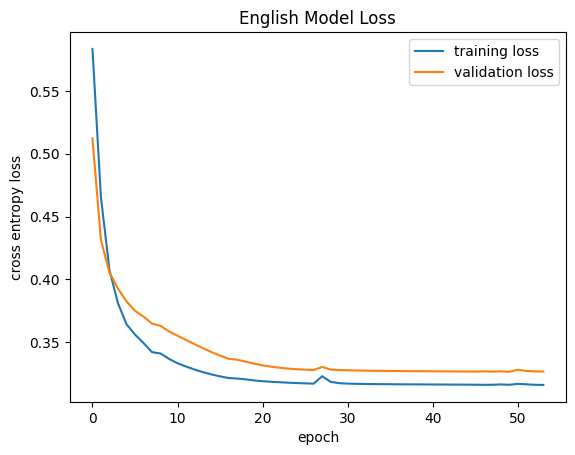

In [22]:
english_results = os.path.join(RESULTS_PATH, 'train',ENGLISH_MODEL, 'result_metrics.csv')
english_df = pd.read_csv(english_results)
plt.title('English Model Loss')
loss_curves(english_df)

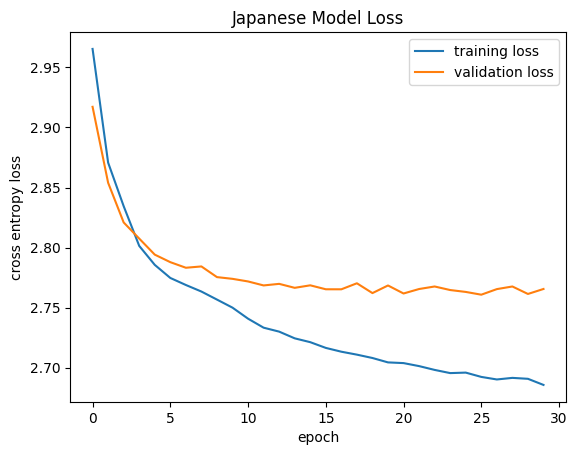

In [23]:
japanese_results = os.path.join(RESULTS_PATH, 'train',JAPANESE_MODEL, 'result_metrics.csv')
japanese_df = pd.read_csv(japanese_results)
plt.title('Japanese Model Loss')
loss_curves(japanese_df)

### Metrics

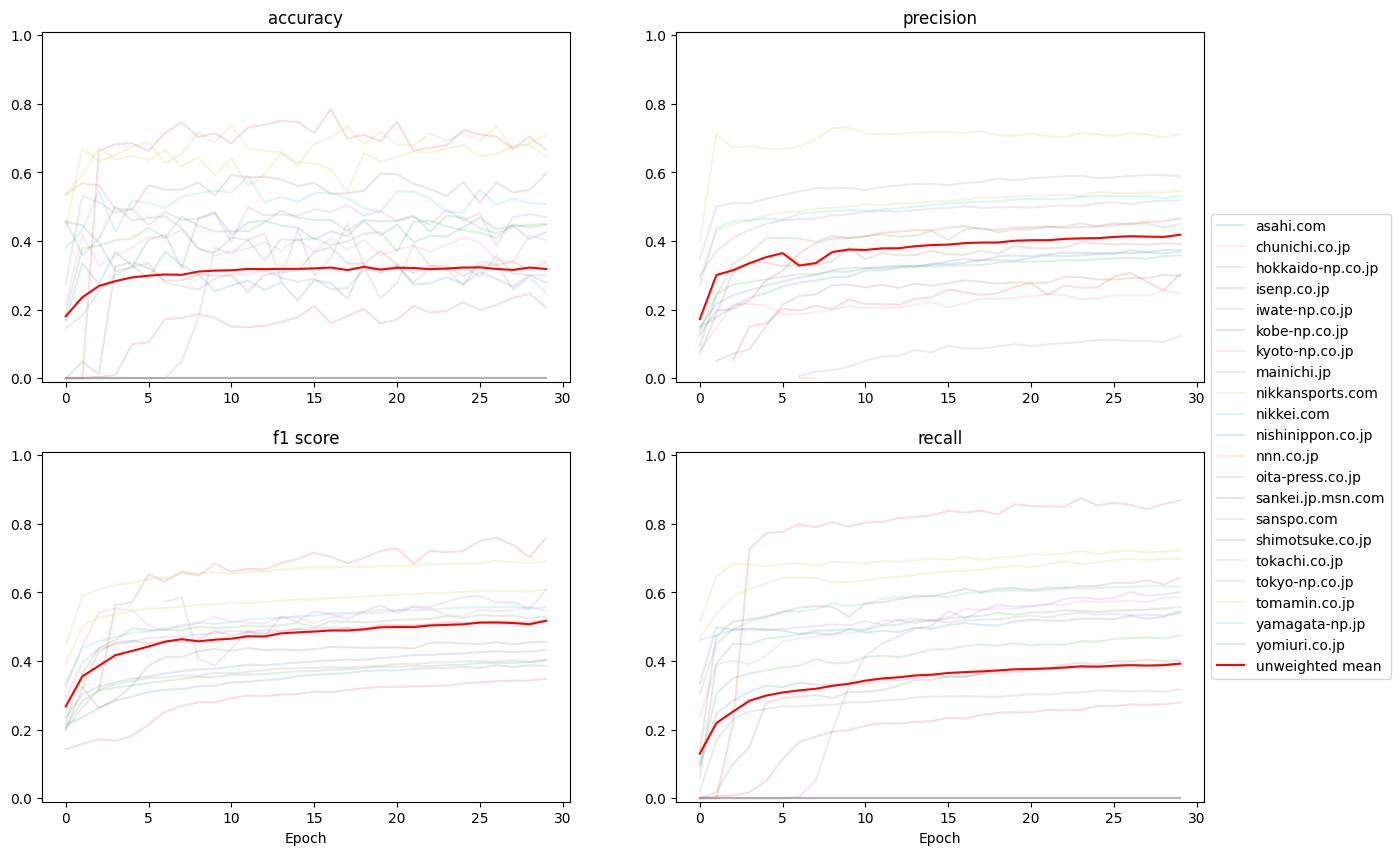

In [24]:
metrics_grid(japanese_df, labels_japanese)

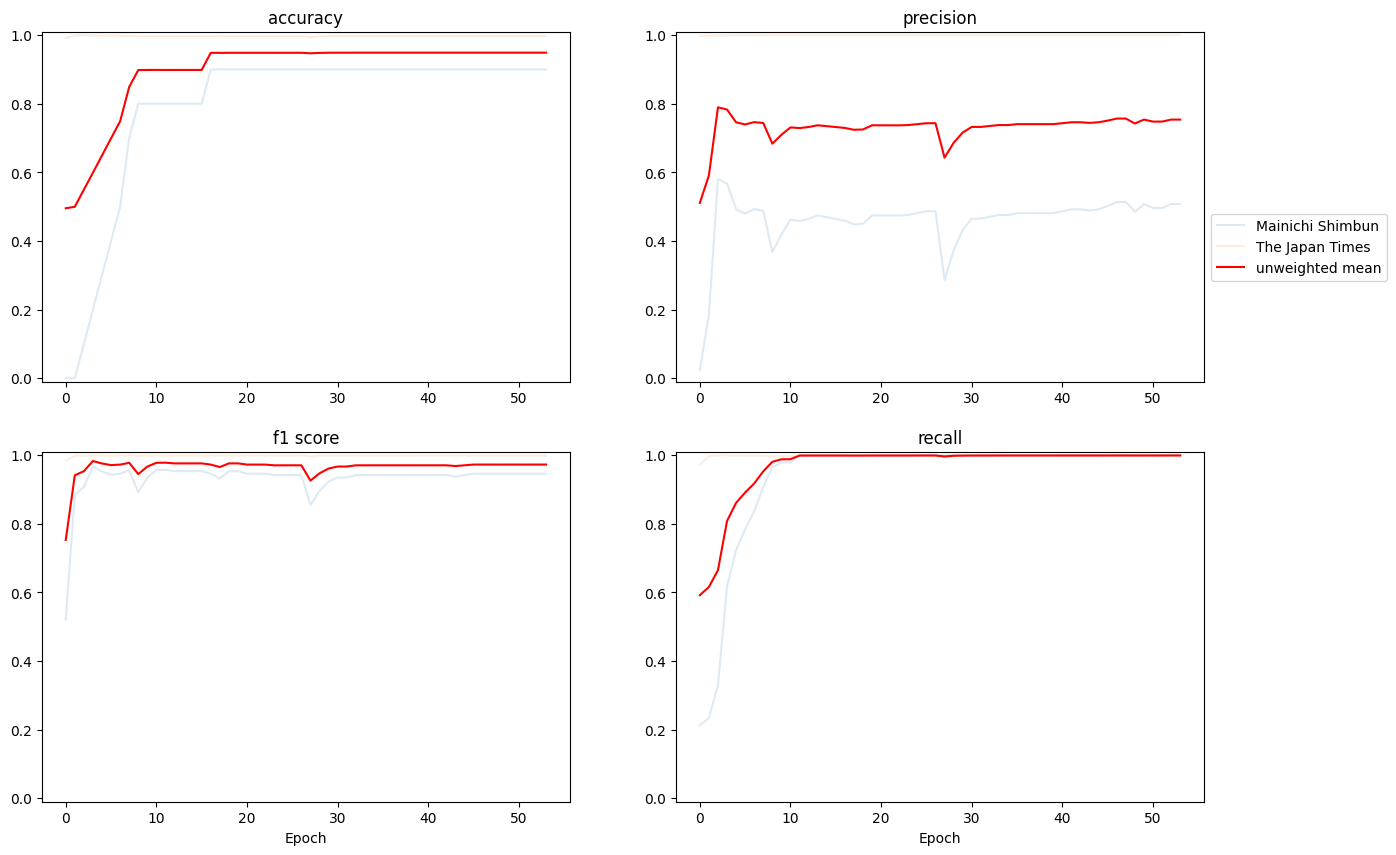

In [25]:
metrics_grid(english_df, labels_englsih)